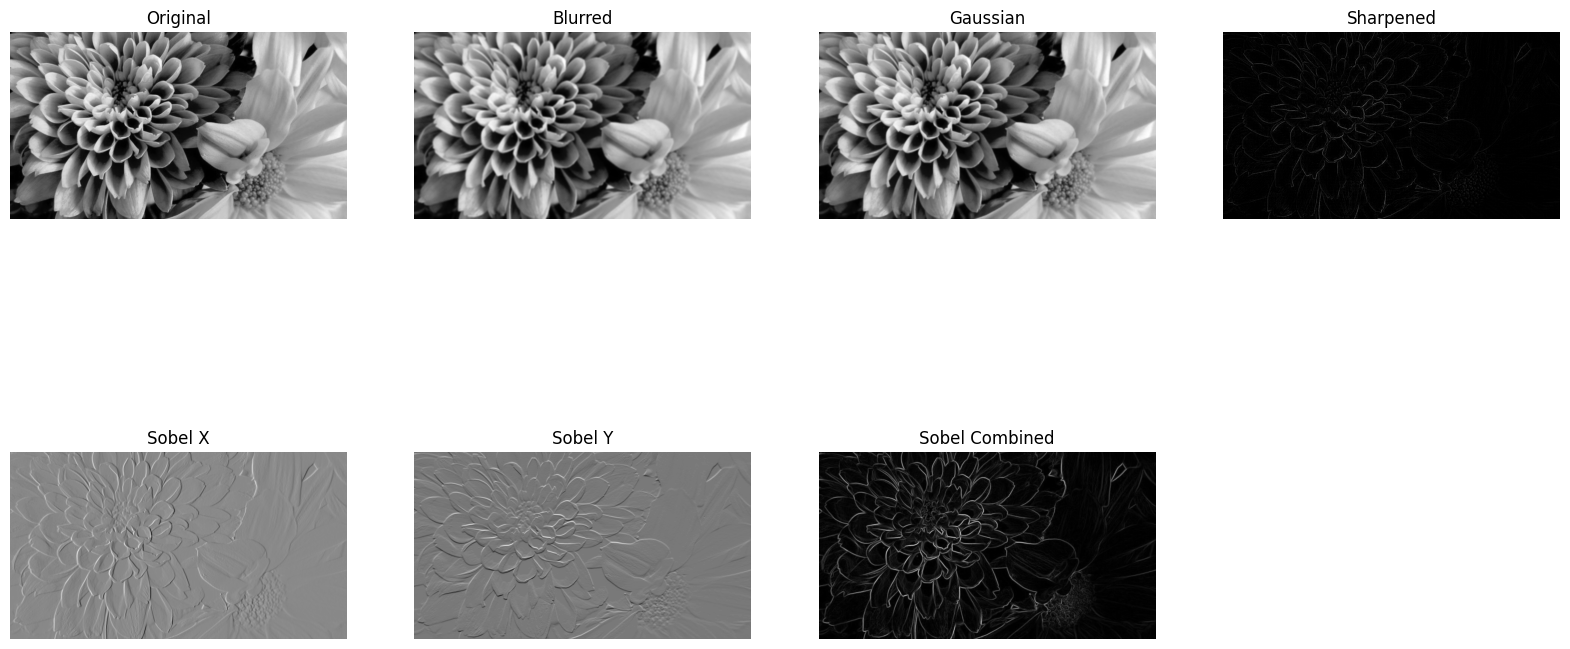

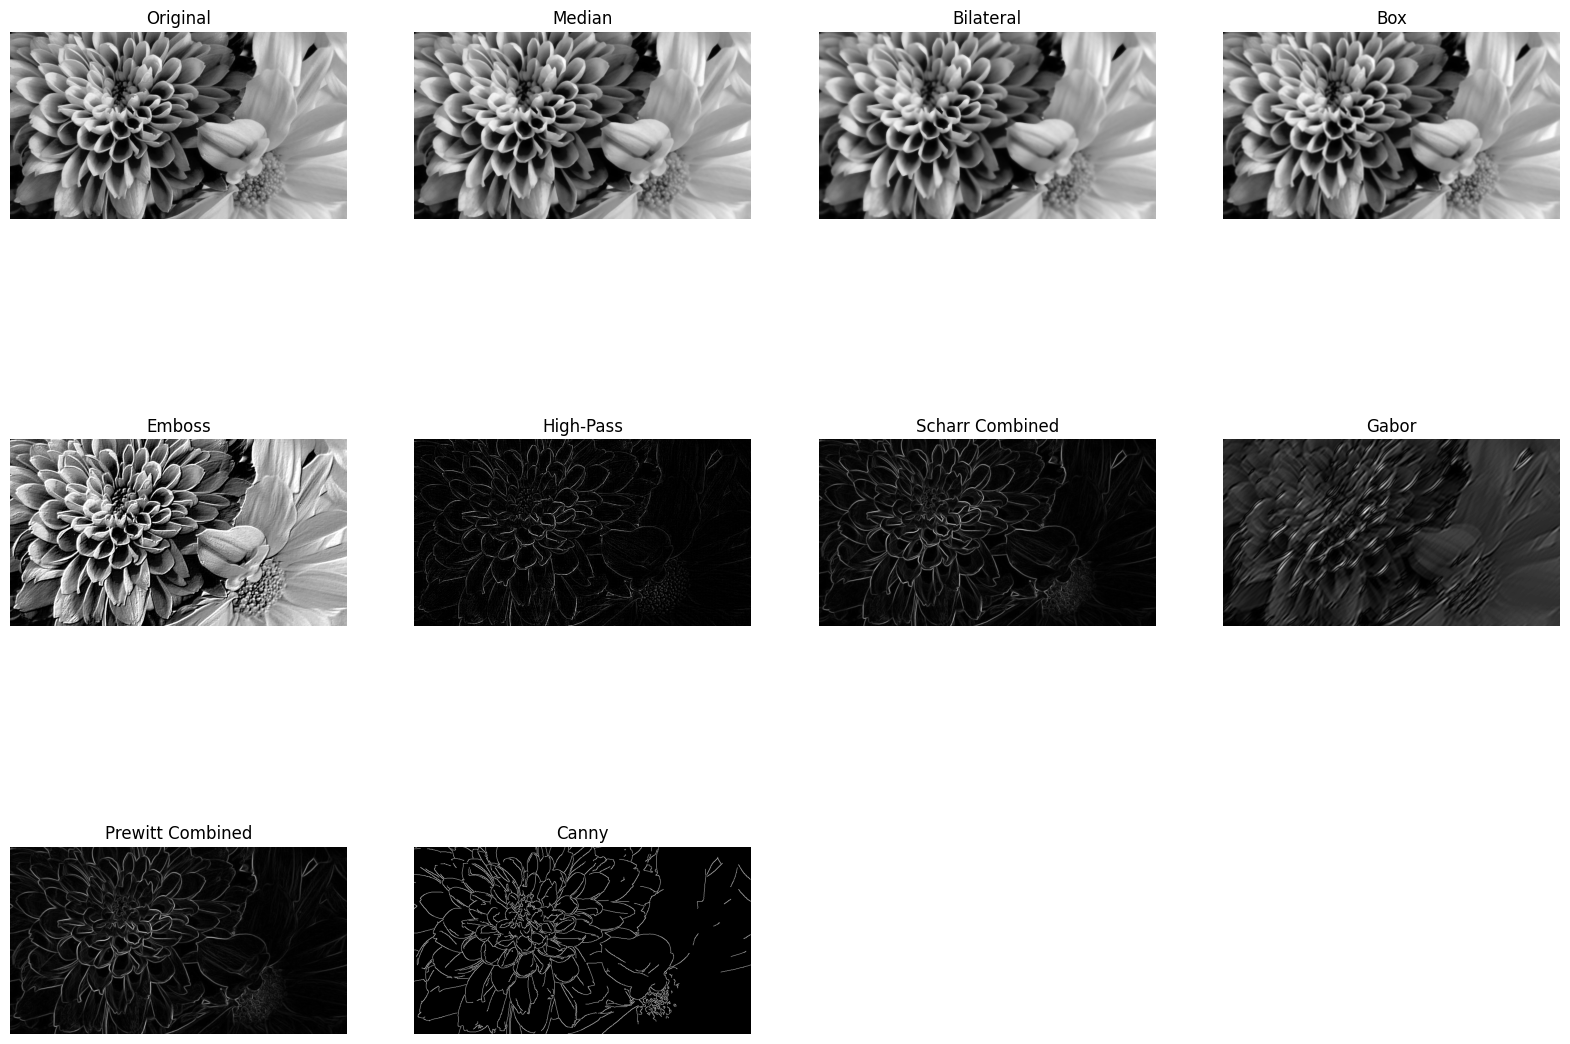

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
image = cv2.imread('pic1.jpg')

# Chuyển ảnh sang thang độ xám
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# PHẦN 1: Bộ lọc cơ bản
# Bộ lọc làm mờ (Average Filter): Chức năng: Bộ lọc làm mờ (hay còn gọi là bộ lọc trung bình) được sử dụng để giảm nhiễu trong ảnh bằng cách tính trung bình giá trị của các pixel xung quanh một pixel trung tâm. Điều này làm cho ảnh trở nên mượt mà hơn, nhưng cũng có thể làm mất đi một số chi tiết nhỏ trong ảnh.
# Cách hoạt động: Mỗi pixel trong ảnh mới là giá trị trung bình của các pixel xung quanh nó trong một cửa sổ có kích thước xác định. Bộ lọc này giúp làm giảm sự biến đổi cường độ giữa các pixel lân cận.
kernel_average = np.ones((5,5),np.float32)/25
blurred_image = cv2.filter2D(gray_image, -1, kernel_average)

# Bộ lọc Gaussian: Chức năng: Bộ lọc Gaussian cũng là một loại bộ lọc làm mờ, nhưng nó sử dụng một hàm Gaussian để tính toán trọng số cho các pixel xung quanh. Các pixel gần với pixel trung tâm có trọng số cao hơn, dẫn đến hiệu ứng làm mờ mượt mà hơn so với bộ lọc trung bình.
# Cách hoạt động: Một kernel Gaussian được sử dụng để làm mờ ảnh. Kernel này được tạo ra bởi hàm Gaussian và giúp giảm thiểu ảnh hưởng của nhiễu bằng cách mượt hóa các chi tiết nhỏ mà vẫn giữ được các cạnh lớn trong ảnh.
kernel_gaussian = cv2.getGaussianKernel(5, 1)
kernel_gaussian = kernel_gaussian @ kernel_gaussian.T
gaussian_image = cv2.filter2D(gray_image, -1, kernel_gaussian)

# Bộ lọc Laplacian (Sharpening): Chức năng: Bộ lọc Laplacian là một bộ lọc phát hiện biên, được sử dụng để tăng cường các chi tiết và biên của đối tượng trong ảnh. Nó có thể làm sắc nét ảnh bằng cách nhấn mạnh các vùng có sự thay đổi cường độ lớn.
# Cách hoạt động: Bộ lọc này tính toán đạo hàm bậc hai của ảnh, làm nổi bật các vùng có sự thay đổi đột ngột về cường độ (biên). Kết quả là ảnh sắc nét hơn với các biên rõ ràng hơn.
kernel_laplacian = np.array([[0, -1, 0], 
                             [-1, 4,-1],
                             [0, -1, 0]])
sharpened_image = cv2.filter2D(gray_image, -1, kernel_laplacian)

# Bộ lọc Sobel (Edge Detection): Chức năng: Bộ lọc Sobel là một phương pháp phổ biến để phát hiện cạnh trong ảnh, bằng cách tính toán gradient của cường độ ảnh theo hướng ngang (X) và dọc (Y).
# Cách hoạt động: Bộ lọc Sobel sử dụng hai kernel để tính toán gradient theo cả hai hướng X và Y. Sau đó, hai gradient này được kết hợp để tạo ra một ảnh thể hiện cường độ biên của ảnh gốc. Biên được xác định ở những nơi có sự thay đổi lớn về cường độ.
kernel_sobel_x = np.array([[-1, 0, 1], 
                           [-2, 0, 2], 
                           [-1, 0, 1]])
kernel_sobel_y = np.array([[-1, -2, -1], 
                           [ 0,  0,  0], 
                           [ 1,  2,  1]])
sobel_x_image = cv2.filter2D(gray_image, cv2.CV_32F, kernel_sobel_x)
sobel_y_image = cv2.filter2D(gray_image, cv2.CV_32F, kernel_sobel_y)
sobel_combined = cv2.magnitude(sobel_x_image, sobel_y_image)

# Tạo danh sách các ảnh và tiêu đề cho phần 1
images_1 = [gray_image, blurred_image, gaussian_image, sharpened_image, sobel_x_image, sobel_y_image, sobel_combined]
titles_1 = ['Original', 'Blurred', 'Gaussian', 'Sharpened', 'Sobel X', 'Sobel Y', 'Sobel Combined']

# Vẽ các ảnh phần 1
plt.figure(figsize=(20, 10))
for i in range(len(images_1)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images_1[i], cmap='gray')
    plt.title(titles_1[i])
    plt.axis('off')
plt.show()

# PHẦN 2: Các bộ lọc khác
# Áp dụng bộ lọc Median: Chức năng: Bộ lọc Median được sử dụng để giảm nhiễu muối tiêu trong ảnh (salt-and-pepper noise). Nó giữ nguyên các biên của đối tượng trong khi loại bỏ các nhiễu đột biến.
# Cách hoạt động: Thay vì tính trung bình các giá trị pixel như bộ lọc trung bình, bộ lọc Median thay thế mỗi pixel bằng giá trị trung vị của các pixel xung quanh trong cửa sổ lọc. Điều này giúp loại bỏ các pixel bị nhiễu mà không làm mờ biên.
median_image = cv2.medianBlur(gray_image, 5)

# Áp dụng bộ lọc Bilateral: Chức năng: Bộ lọc Bilateral là một bộ lọc làm mờ nhưng bảo tồn biên rất hiệu quả. Nó làm mờ các vùng đồng nhất trong ảnh trong khi vẫn giữ nguyên các cạnh sắc nét.
# Cách hoạt động: Bộ lọc này kết hợp hai yếu tố: khoảng cách trong không gian và khoảng cách về giá trị cường độ để xác định mức độ ảnh hưởng của các pixel lân cận. Kết quả là ảnh được làm mờ nhưng các cạnh vẫn được giữ lại.
bilateral_image = cv2.bilateralFilter(gray_image, 9, 75, 75)

# Áp dụng bộ lọc Box: Chức năng: Bộ lọc Box là một biến thể đơn giản của bộ lọc làm mờ, thường được sử dụng để làm mịn ảnh mà không cần trọng số phức tạp.
# Cách hoạt động: Tương tự như bộ lọc trung bình, nhưng thay vì chia trung bình bằng trọng số, bộ lọc Box sử dụng các trọng số bằng nhau cho tất cả các pixel trong cửa sổ lọc.
box_image = cv2.boxFilter(gray_image, -1, (5, 5))

# Kernel Emboss: Chức năng: Bộ lọc Emboss tạo ra hiệu ứng nổi, làm cho các đối tượng trong ảnh trông giống như chúng được khắc hoặc chạm nổi.
# Cách hoạt động: Bộ lọc này tạo ra sự khác biệt giữa các pixel lân cận để nhấn mạnh các cạnh theo một hướng cụ thể, tạo ra hiệu ứng giống như ánh sáng chiếu từ một góc nhất định, tạo ra các vùng sáng và tối tương ứng.
kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])
emboss_image = cv2.filter2D(gray_image, -1, kernel_emboss)

# Kernel High-Pass: Chức năng: Bộ lọc High-Pass được sử dụng để giữ lại các tần số cao trong ảnh, tức là các biên và chi tiết sắc nét, trong khi loại bỏ các vùng tần số thấp (như nền mờ).
# Cách hoạt động: Bộ lọc này sử dụng một kernel để loại bỏ các thành phần tần số thấp và chỉ giữ lại các thành phần tần số cao, giúp làm nổi bật các chi tiết nhỏ và biên của đối tượng.
kernel_highpass = np.array([[-1, -1, -1],
                            [-1,  8, -1],
                            [-1, -1, -1]])
highpass_image = cv2.filter2D(gray_image, -1, kernel_highpass)

# Áp dụng bộ lọc Scharr: Chức năng: Bộ lọc Scharr là một biến thể cải tiến của bộ lọc Sobel, được thiết kế để tính toán gradient chính xác hơn trong ảnh.
# Cách hoạt động: Tương tự như Sobel, nhưng kernel của Scharr được thiết kế để giảm thiểu lỗi tính toán gradient. Kết quả là các biên được phát hiện chính xác hơn, đặc biệt là trong các ảnh có nhiễu.
scharr_x_image = cv2.Scharr(gray_image, cv2.CV_32F, 1, 0)
scharr_y_image = cv2.Scharr(gray_image, cv2.CV_32F, 0, 1)
scharr_combined = cv2.magnitude(scharr_x_image, scharr_y_image)

# Áp dụng bộ lọc Gabor: Chức năng: Bộ lọc Gabor được sử dụng trong nhận dạng mẫu và phân tích kết cấu. Nó có thể lọc ra các đặc trưng cụ thể như các đường thẳng, vân hoặc các họa tiết trong ảnh.
# Cách hoạt động: Bộ lọc Gabor sử dụng một hàm sinusoidal điều biến theo một Gaussian để trích xuất các đặc trưng với hướng và tần số cụ thể trong ảnh. Nó được dùng phổ biến trong xử lý ảnh y khoa và nhận diện khuôn mặt.
gabor_kernel = cv2.getGaborKernel((21, 21), 5, np.pi/4, 10, 0.5, 0, ktype=cv2.CV_32F)
gabor_image = cv2.filter2D(gray_image, cv2.CV_32F, gabor_kernel)

# Kernel Prewitt: Chức năng: Bộ lọc Prewitt là một phương pháp phát hiện cạnh tương tự như Sobel, nhưng sử dụng các kernel khác nhau.
# Cách hoạt động: Bộ lọc này sử dụng hai kernel để tính toán gradient theo hướng ngang và dọc. Kết quả là các cạnh trong ảnh được làm nổi bật, tuy nhiên nó có thể kém chính xác hơn Sobel trong một số trường hợp.
kernel_prewitt_x = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]])
kernel_prewitt_y = np.array([[ 1,  1,  1],
                             [ 0,  0,  0],
                             [-1, -1, -1]])
prewitt_x_image = cv2.filter2D(gray_image, cv2.CV_32F, kernel_prewitt_x)
prewitt_y_image = cv2.filter2D(gray_image, cv2.CV_32F, kernel_prewitt_y)
prewitt_combined = cv2.magnitude(prewitt_x_image, prewitt_y_image)

# Áp dụng bộ lọc Canny: Chức năng: Bộ lọc Canny là một kỹ thuật phát hiện biên tiên tiến, thường được coi là một trong những bộ lọc phát hiện cạnh tốt nhất.
# Cách hoạt động: Bộ lọc Canny thực hiện qua nhiều bước: làm mờ ảnh, tính toán gradient, non-maximum suppression để loại bỏ các cạnh không cần thiết, và hysteresis thresholding để xác định các biên cuối cùng. Kết quả là một ảnh với các cạnh được phát hiện rõ ràng và chính xác.
canny_image = cv2.Canny(gray_image, 100, 200)

# Tạo danh sách các ảnh và tiêu đề cho phần 2
images_2 = [gray_image, median_image, bilateral_image, box_image, emboss_image, highpass_image, scharr_combined, gabor_image, prewitt_combined, canny_image]
titles_2 = ['Original', 'Median', 'Bilateral', 'Box', 'Emboss', 'High-Pass', 'Scharr Combined', 'Gabor', 'Prewitt Combined', 'Canny']

# Vẽ các ảnh phần 2
plt.figure(figsize=(20, 15))
for i in range(len(images_2)):
    plt.subplot(3, 4, i+1)
    plt.imshow(np.abs(images_2[i]), cmap='gray')
    plt.title(titles_2[i])
    plt.axis('off')
plt.show()


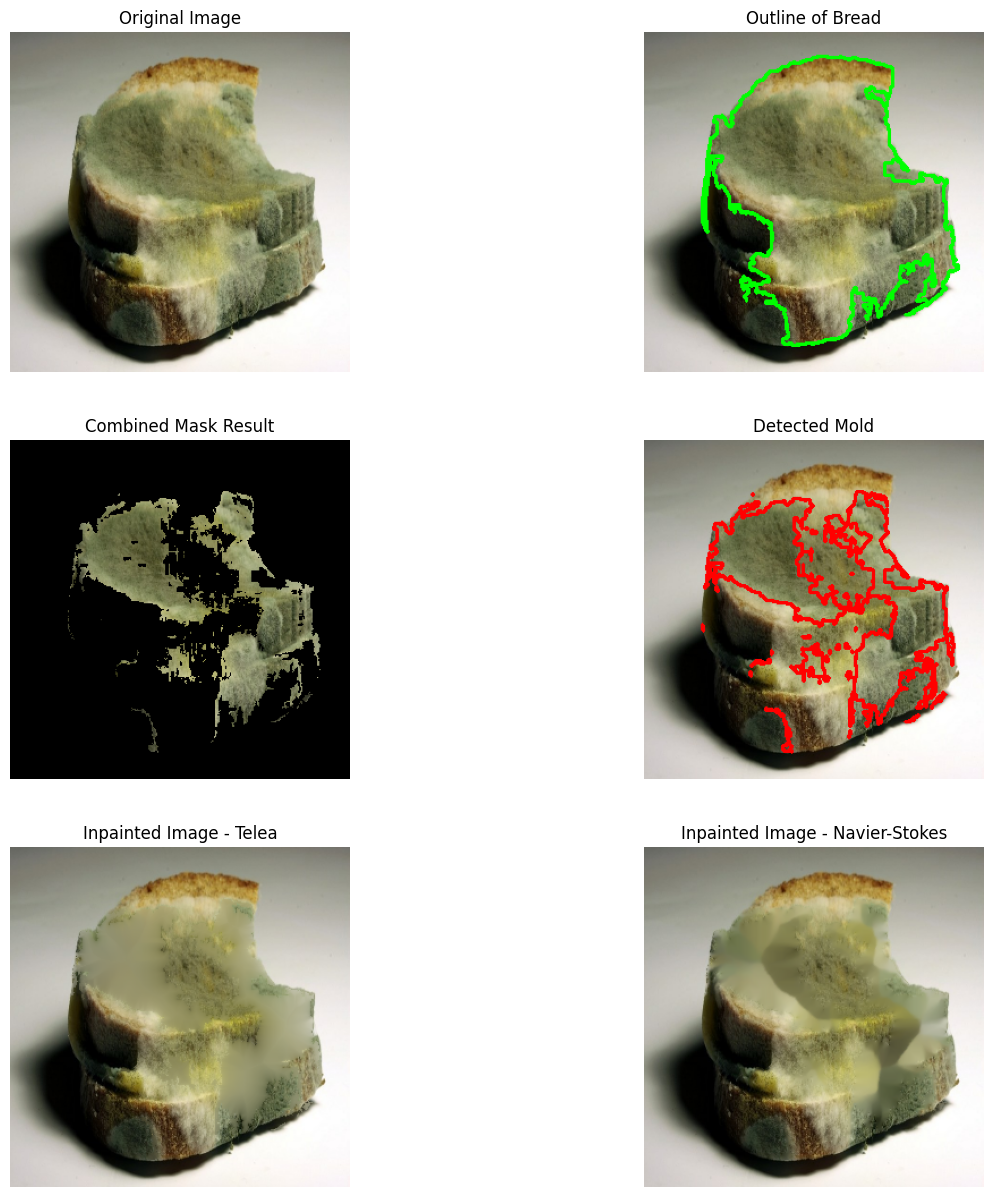

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và thay đổi kích thước
img = cv2.imread('pic4.jpg')
img_resized = cv2.resize(img, (300, 300))

# Chuyển đổi sang không gian màu HSV
hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)

# Định nghĩa khoảng màu cho vàng óng hoặc cam vàng (bánh mì)
lower_yellow_orange = np.array([15, 50, 50])
upper_yellow_orange = np.array([35, 255, 255])

# Định nghĩa khoảng màu cho mốc
lower_green_mold = np.array([30, 40, 40])
upper_green_mold = np.array([90, 255, 255])

lower_blue_mold = np.array([100, 50, 50])
upper_blue_mold = np.array([140, 255, 255])

# Tạo mặt nạ cho màu bánh mì
mask_bread = cv2.inRange(hsv, lower_yellow_orange, upper_yellow_orange)

# Tạo mặt nạ cho mốc xanh lục và xanh dương
mask_green_mold = cv2.inRange(hsv, lower_green_mold, upper_green_mold)
mask_blue_mold = cv2.inRange(hsv, lower_blue_mold, upper_blue_mold)

# Kết hợp hai mặt nạ của mốc
mask_mold = cv2.bitwise_or(mask_green_mold, mask_blue_mold)

# Áp dụng mask lên ảnh gốc để thấy rõ các vùng bánh mì
result_bread = cv2.bitwise_and(img_resized, img_resized, mask=mask_bread)

# Tìm các contours từ mask bánh mì
contours_bread, _ = cv2.findContours(mask_bread, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tạo một bản sao của ảnh gốc để vẽ outline bánh mì
img_with_outline = img_resized.copy()
for contour in contours_bread:
    if cv2.contourArea(contour) > 1000:  # Chỉ vẽ các contour có diện tích lớn hơn 1000
        cv2.drawContours(img_with_outline, [contour], -1, (0, 255, 0), 2)

# Tạo mask cho vùng bên trong outline bánh mì
bread_mask = np.zeros_like(mask_bread)
cv2.drawContours(bread_mask, [contour for contour in contours_bread if cv2.contourArea(contour) > 1000], -1, 255, thickness=cv2.FILLED)

# Kết hợp các mặt nạ để chỉ phát hiện mốc bên trong vùng màu bánh mì
combined_mask = cv2.bitwise_and(bread_mask, mask_mold)

# Áp dụng mask lên ảnh gốc để thấy rõ các vùng bị mốc
result_combined = cv2.bitwise_and(img_resized, img_resized, mask=combined_mask)

# Tìm các contours từ mask kết hợp
contours_mold, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tạo một mask tổng hợp cho vùng mốc
mold_mask = np.zeros_like(mask_bread)
for contour in contours_mold:
    if cv2.contourArea(contour) > 0:
        cv2.drawContours(mold_mask, [contour], -1, 255, thickness=cv2.FILLED)

# Tạo một bản sao của ảnh gốc để vẽ các vùng mốc
img_with_mold = img_resized.copy()
for contour in contours_mold:
    if cv2.contourArea(contour) > 0:
        cv2.drawContours(img_with_mold, [contour], -1, (0, 0, 255), 2)

# Inpainting để xóa mốc sử dụng kỹ thuật Telea
inpainted_image_telea = cv2.inpaint(img_resized, mold_mask, 100, cv2.INPAINT_TELEA)

# Inpainting để xóa mốc sử dụng kỹ thuật Navier-Stokes
inpainted_image_ns = cv2.inpaint(img_resized, mold_mask, 100, cv2.INPAINT_NS)

# Chuyển đổi ảnh từ BGR sang RGB cho matplotlib
img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
img_with_outline_rgb = cv2.cvtColor(img_with_outline, cv2.COLOR_BGR2RGB)
result_combined_rgb = cv2.cvtColor(result_combined, cv2.COLOR_BGR2RGB)
img_with_mold_rgb = cv2.cvtColor(img_with_mold, cv2.COLOR_BGR2RGB)
inpainted_image_telea_rgb = cv2.cvtColor(inpainted_image_telea, cv2.COLOR_BGR2RGB)
inpainted_image_ns_rgb = cv2.cvtColor(inpainted_image_ns, cv2.COLOR_BGR2RGB)

# Hiển thị các ảnh
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].imshow(img_resized_rgb)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_with_outline_rgb)
axs[0, 1].set_title('Outline of Bread')
axs[0, 1].axis('off')

axs[1, 0].imshow(result_combined_rgb)
axs[1, 0].set_title('Combined Mask Result')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_with_mold_rgb)
axs[1, 1].set_title('Detected Mold')
axs[1, 1].axis('off')

axs[2, 0].imshow(inpainted_image_telea_rgb)
axs[2, 0].set_title('Inpainted Image - Telea')
axs[2, 0].axis('off')

axs[2, 1].imshow(inpainted_image_ns_rgb)
axs[2, 1].set_title('Inpainted Image - Navier-Stokes')
axs[2, 1].axis('off')

plt.show()


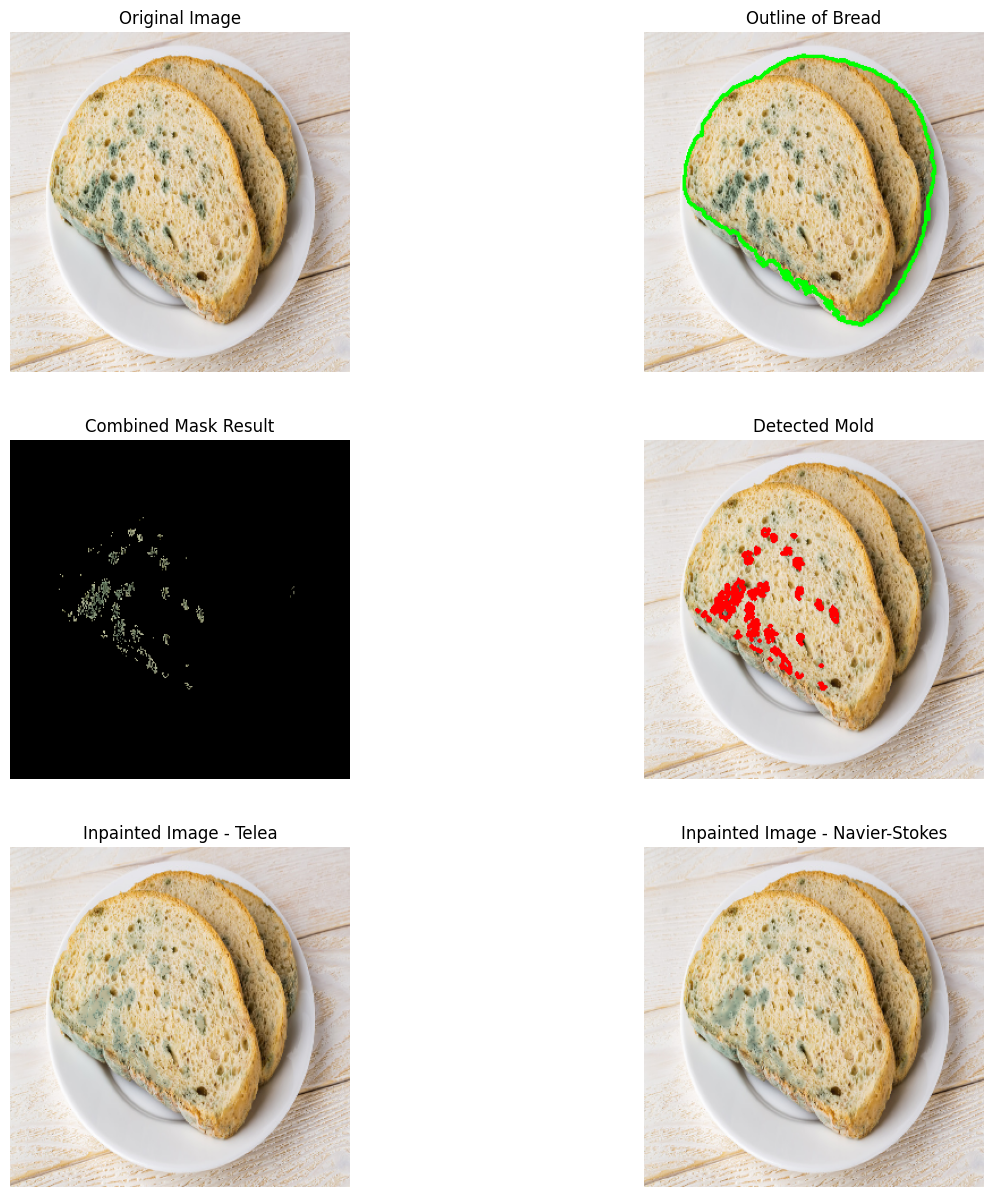

: 

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh và thay đổi kích thước
img = cv2.imread('pic7.jpg')
img_resized = cv2.resize(img, (300, 300))

# Chuyển đổi sang không gian màu HSV
hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)

# Định nghĩa khoảng màu cho vàng óng hoặc cam vàng (bánh mì)
lower_yellow_orange = np.array([15, 50, 50])
upper_yellow_orange = np.array([35, 255, 255])

# Định nghĩa khoảng màu cho mốc
lower_green_mold = np.array([30, 40, 40])
upper_green_mold = np.array([90, 255, 255])

lower_blue_mold = np.array([100, 50, 50])
upper_blue_mold = np.array([140, 255, 255])

# Tạo mặt nạ cho màu bánh mì
mask_bread = cv2.inRange(hsv, lower_yellow_orange, upper_yellow_orange)

# Tạo mặt nạ cho mốc xanh lục và xanh dương
mask_green_mold = cv2.inRange(hsv, lower_green_mold, upper_green_mold)
mask_blue_mold = cv2.inRange(hsv, lower_blue_mold, upper_blue_mold)

# Kết hợp hai mặt nạ của mốc
mask_mold = cv2.bitwise_or(mask_green_mold, mask_blue_mold)

# Áp dụng mask lên ảnh gốc để thấy rõ các vùng bánh mì
result_bread = cv2.bitwise_and(img_resized, img_resized, mask=mask_bread)

# Tìm các contours từ mask bánh mì
contours_bread, _ = cv2.findContours(mask_bread, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tạo một bản sao của ảnh gốc để vẽ outline bánh mì
img_with_outline = img_resized.copy()
for contour in contours_bread:
    if cv2.contourArea(contour) > 1000:  # Chỉ vẽ các contour có diện tích lớn hơn 1000
        cv2.drawContours(img_with_outline, [contour], -1, (0, 255, 0), 2)

# Tạo mask cho vùng bên trong outline bánh mì
bread_mask = np.zeros_like(mask_bread)
cv2.drawContours(bread_mask, [contour for contour in contours_bread if cv2.contourArea(contour) > 1000], -1, 255, thickness=cv2.FILLED)

# Kết hợp các mặt nạ để chỉ phát hiện mốc bên trong vùng màu bánh mì
combined_mask = cv2.bitwise_and(bread_mask, mask_mold)

# Áp dụng mask lên ảnh gốc để thấy rõ các vùng bị mốc
result_combined = cv2.bitwise_and(img_resized, img_resized, mask=combined_mask)

# Tìm các contours từ mask kết hợp
contours_mold, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tạo một mask tổng hợp cho vùng mốc
mold_mask = np.zeros_like(mask_bread)
for contour in contours_mold:
    if cv2.contourArea(contour) > 0:
        cv2.drawContours(mold_mask, [contour], -1, 255, thickness=cv2.FILLED)

# Tạo một bản sao của ảnh gốc để vẽ các vùng mốc
img_with_mold = img_resized.copy()
for contour in contours_mold:
    if cv2.contourArea(contour) > 0:
        cv2.drawContours(img_with_mold, [contour], -1, (0, 0, 255), 2)

# Inpainting để xóa mốc sử dụng kỹ thuật Telea
inpainted_image_telea = cv2.inpaint(img_resized, mold_mask, 9000000, cv2.INPAINT_TELEA)

# Inpainting để xóa mốc sử dụng kỹ thuật Navier-Stokes
inpainted_image_ns = cv2.inpaint(img_resized, mold_mask, 9000000, cv2.INPAINT_NS)

# Chuyển đổi ảnh từ BGR sang RGB cho matplotlib
img_resized_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
img_with_outline_rgb = cv2.cvtColor(img_with_outline, cv2.COLOR_BGR2RGB)
result_combined_rgb = cv2.cvtColor(result_combined, cv2.COLOR_BGR2RGB)
img_with_mold_rgb = cv2.cvtColor(img_with_mold, cv2.COLOR_BGR2RGB)
inpainted_image_telea_rgb = cv2.cvtColor(inpainted_image_telea, cv2.COLOR_BGR2RGB)
inpainted_image_ns_rgb = cv2.cvtColor(inpainted_image_ns, cv2.COLOR_BGR2RGB)

# Hiển thị các ảnh
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].imshow(img_resized_rgb)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_with_outline_rgb)
axs[0, 1].set_title('Outline of Bread')
axs[0, 1].axis('off')

axs[1, 0].imshow(result_combined_rgb)
axs[1, 0].set_title('Combined Mask Result')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_with_mold_rgb)
axs[1, 1].set_title('Detected Mold')
axs[1, 1].axis('off')

axs[2, 0].imshow(inpainted_image_telea_rgb)
axs[2, 0].set_title('Inpainted Image - Telea')
axs[2, 0].axis('off')

axs[2, 1].imshow(inpainted_image_ns_rgb)
axs[2, 1].set_title('Inpainted Image - Navier-Stokes')
axs[2, 1].axis('off')

plt.show()
